In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 54.2 MB/s eta 0:00:00


In [3]:
import gensim

In [4]:
from gensim.models import Word2Vec, KeyedVectors

In [5]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [7]:
vec_man = wv['man']
vec_man

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [8]:
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [9]:
print(wv.similarity('man','dog'))
print(wv.similarity('women','dog'))
print(wv.similarity('man','cat'))
print(wv.similarity('women','cat'))

0.3088647
0.08217571
0.29911456
0.07590361


In [10]:
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mp
import pandas as pd
import numpy as np
import re
import nltk
import lxml
from bs4 import BeautifulSoup
import requests

In [25]:
url = "https://en.wikipedia.org/wiki/Ball"
headers = {
    "User-Agent": "Mozilla/5.0"
}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.content, "lxml")

In [26]:
content = soup.find_all("p")

In [27]:
print(content)

[<p class="mw-empty-elt">
</p>, <p>A <b>ball</b> is a round object (usually <a class="mw-redirect" href="/wiki/Spherical" title="Spherical">spherical</a>, but sometimes <a class="mw-redirect" href="/wiki/Ovoid" title="Ovoid">ovoid</a>)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite-bracket">[</span>3<span class="cite-bracket">]</span></a></sup> with several uses. It is used in <a class="mw-redirect" href="/wiki/Ball_games" title="Ball games">ball games</a>, where the play of the game follows the state of the ball as it is hit, kicked or thrown by players. Balls can also be used for simpler activities, such as catch or <a href="/wiki/Juggling" title="Juggling">juggling</a>. 

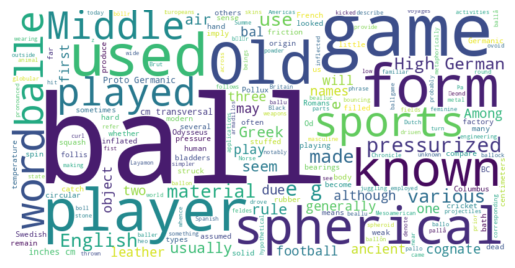

In [28]:
text = " ".join([p.get_text() for p in soup.find_all('p')])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()